In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [26]:
file1=r'疫情尚未结束，多国禁止粮食出口，老百姓需要囤积粮食吗？.csv'
comment1=pd.read_csv(file1,index_col=0)

In [27]:
comment1.head()

,author,voteup_count,content,headline,gender,created_time,updated_time,comment_count,thanks_count,excerpt
No.,,,,,,,,,,
1,大闸蟹,17642,<p>温故而知新。</p><p>07-08次贷危机后是什么，是粮食危机，中招的是谁？是菲律宾...,食烟火的不识烟火的烟火,1.0,1585756046,1586103599,1191,1202,温故而知新。 07-08次贷危机后是什么，是粮食危机，中招的是谁？是菲律宾。 全球根本不缺粮...
2,共青团中央,5785,<p>近日，网上传言疫情可能引发全球粮食危机，有声音号召网友“空下来去超市买点米，囤三个月的...,共青团中央知乎官方帐号,1.0,1585813901,1585813901,1016,480,近日，网上传言疫情可能引发全球粮食危机，有声音号召网友“空下来去超市买点米，囤三个月的粮”。...
3,邱垠,2523,<p>完全，完全，完全，不需要。</p><p>我是学粮食储藏的一名大三学生。之前已经答过一个...,有梦想的咸鱼大学生,-1.0,1585785979,1585795038,428,186,完全，完全，完全，不需要。 我是学粮食储藏的一名大三学生。之前已经答过一个这样的问题，也是没...
4,dhchen,800,<p>要囤。</p><p>但是，不是囤粮食。</p><p>囤点肉，奶粉和常用药。</p><p...,Ph.D. in Mathematics,1.0,1585797091,1585798459,189,67,要囤。 但是，不是囤粮食。 囤点肉，奶粉和常用药。 为什么？因为在中国，粮食储备非常够。粮食...
5,正解局,8031,"<figure data-size=""normal""><img src=""https://p...",穿透信息迷雾，正解中国成长的力量。,-1.0,1585633758,1585634061,1047,708,[图片] ◆要回答这个问题，可以从中国几种主要粮食的进出口情况入手来分析。14亿的人口大国，...


In [69]:
comment1.columns

Index(['author', 'voteup_count', 'content', 'headline', 'gender',
       'created_time', 'updated_time', 'comment_count', 'thanks_count',
       'excerpt', 'label'],
      dtype='object')

In [92]:
column=[ 'comment_count','gender','thanks_count', 'voteup_count']

In [93]:
data1=comment1[column].copy()

In [102]:
data1['gender'].fillna(value=0,inplace=True)

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
data11 = MinMaxScaler().fit_transform(data1)
data1 = pd.DataFrame(data11,index=data1.index,columns=data1.columns)

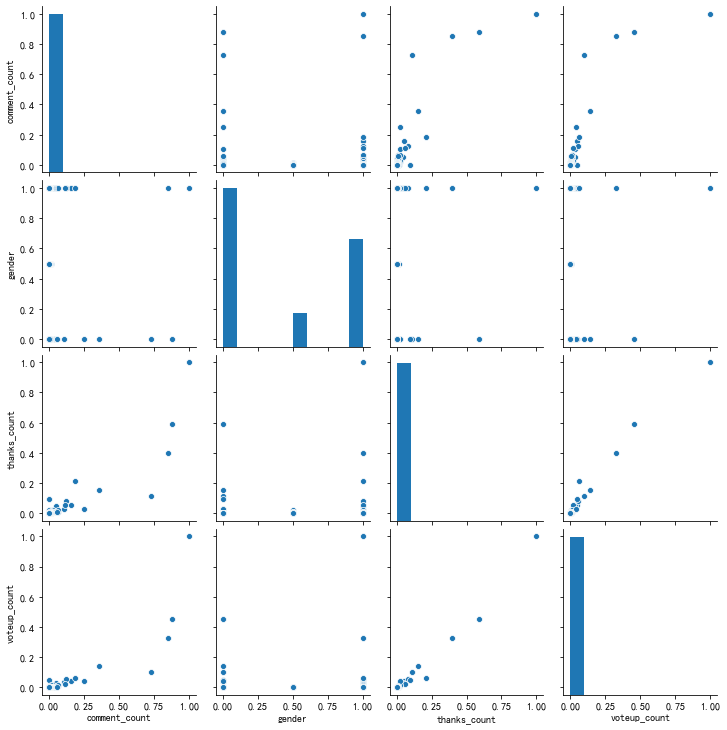

In [105]:
sns.pairplot(data1)

In [106]:
from scipy.cluster import hierarchy  #层次聚类

In [107]:
#先计算距离矩阵，再聚类（类间距）
dis = hierarchy.distance.pdist(data1,'euclidean') 

In [108]:
clust = hierarchy.linkage(dis, method ='ward') 

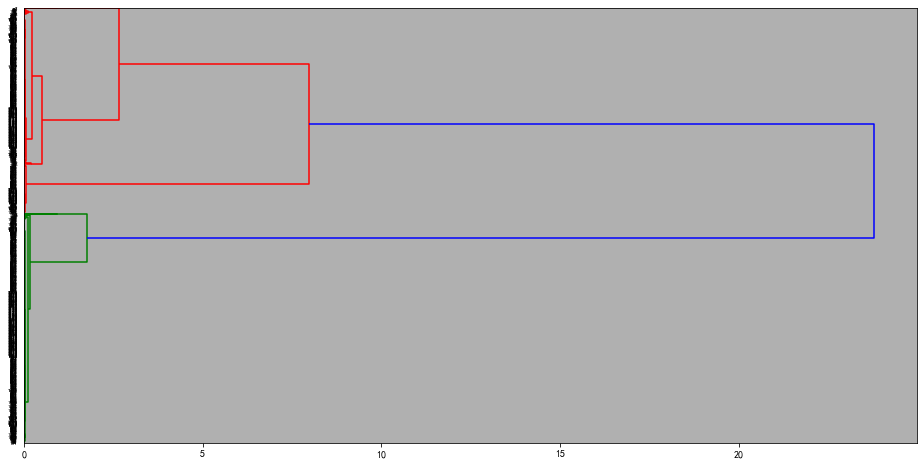

In [109]:
#画聚类层次图
plt.figure(figsize=(16,8))
p = hierarchy.dendrogram(clust,orientation='right',labels = data1.index)#orientation='right,left,bottom'
plt.grid()

可以看出分成四类比较合适

In [79]:
from sklearn.cluster import KMeans  #k均值聚类

In [117]:
k=4
kmeans = KMeans(n_clusters=k,init='k-means++')#init='k-means++'为选择初始质心的方法，同时需要指定调整次数max_iter=300(默认)
kmeans.fit(data1)#kmeans为训练好的聚类模型
label_k = kmeans.labels_ #获取各观测聚类标签
centroids = pd.DataFrame(kmeans.cluster_centers_ , columns=data1.columns)          #获取聚类中心,并转化为Dataframe
centroids

,comment_count,gender,thanks_count,voteup_count,label
0,0.002740,1.000000e+00,0.001486,0.000811,1.000000e+00
1,0.002567,1.165734e-15,0.000740,0.000580,-7.771561e-15
2,0.000865,5.000000e-01,0.000428,0.000168,2.000000e+00
3,0.910719,6.666667e-01,0.662784,0.594377,3.000000e+00


In [111]:
data1['label']=label_k
comment1['label']=label_k

In [112]:
comment1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 1 to 1469
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author         1468 non-null   object 
 1   voteup_count   1469 non-null   int64  
 2   content        1469 non-null   object 
 3   headline       851 non-null    object 
 4   gender         1336 non-null   float64
 5   created_time   1469 non-null   int64  
 6   updated_time   1469 non-null   int64  
 7   comment_count  1469 non-null   int64  
 8   thanks_count   1469 non-null   int64  
 9   excerpt        1469 non-null   object 
 10  label          1469 non-null   int32  
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 132.0+ KB


In [118]:
comment1['label'].value_counts()

0    774
1    525
2    167
3      3
Name: label, dtype: int64

In [119]:
a=comment1[comment1['label']==0]
b=comment1[comment1['label']==1]
c=comment1[comment1['label']==2]
d=comment1[comment1['label']==3]

In [120]:
for s in [a,b,c,d]:
    s=s.drop(axis=1,columns=['label'])


In [126]:
a.to_csv("点赞量很高的评论.csv",encoding='utf_8_sig',index=False)
b.to_csv("点赞量中等的评论.csv",encoding='utf_8_sig',index=False)
c.to_csv("点赞量很少的评论.csv",encoding='utf_8_sig',index=False)
d.to_csv("点赞量极高的评论.csv",encoding='utf_8_sig',index=False)